Things to consider:

* Structure of true system known or not

* Cost of intervention (look at outcome under different cost per action scenarios)

* Proportion of variables in system that are observed

* Must ensure that results are reproducible (work out consistent random seed)

In [1]:
import datetime
import itertools
import pandas as pd
from matplotlib import pyplot as plt
from true_systems.mammonet_breast_cancer_diagnosis import mammonet_system

/Users/josephbolton/python_virtual_envs/base_experimentation_env_v2/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
true_systems_dict = {
    "mammonet": mammonet_system,
}

In [3]:
# create all scenarios
true_systems = true_systems_dict.keys()
cost_per_intervention = [0,10]
true_system_structure_known = ["yes","no"]
proportion_of_variables_observed = [1.0, 0.75, 0.5]
all_scenario_variables = [
    true_systems,
    cost_per_intervention,
    true_system_structure_known,
    proportion_of_variables_observed,
]
all_scenarios = list(itertools.product(*all_scenario_variables))
cntr = 0
for scenario in all_scenarios:
    cntr += 1
    print(f"scenario {cntr}: true_system={scenario[0]}, cost_per_intervention={scenario[1]} true_system_structure_known={scenario[2]} proportion_of_variables_observed={scenario[3]}")

scenario 1: true_system=mammonet, cost_per_intervention=0 true_system_structure_known=yes proportion_of_variables_observed=1.0
scenario 2: true_system=mammonet, cost_per_intervention=0 true_system_structure_known=yes proportion_of_variables_observed=0.75
scenario 3: true_system=mammonet, cost_per_intervention=0 true_system_structure_known=yes proportion_of_variables_observed=0.5
scenario 4: true_system=mammonet, cost_per_intervention=0 true_system_structure_known=no proportion_of_variables_observed=1.0
scenario 5: true_system=mammonet, cost_per_intervention=0 true_system_structure_known=no proportion_of_variables_observed=0.75
scenario 6: true_system=mammonet, cost_per_intervention=0 true_system_structure_known=no proportion_of_variables_observed=0.5
scenario 7: true_system=mammonet, cost_per_intervention=10 true_system_structure_known=yes proportion_of_variables_observed=1.0
scenario 8: true_system=mammonet, cost_per_intervention=10 true_system_structure_known=yes proportion_of_variab


        System Name:    MammoNet
        System Source:  [paper] Construction of a Bayesian Network for Mammographic Diagnosis of Breast Cancer Kahn Jr et al. (1996)
        


<Figure size 500x500 with 0 Axes>

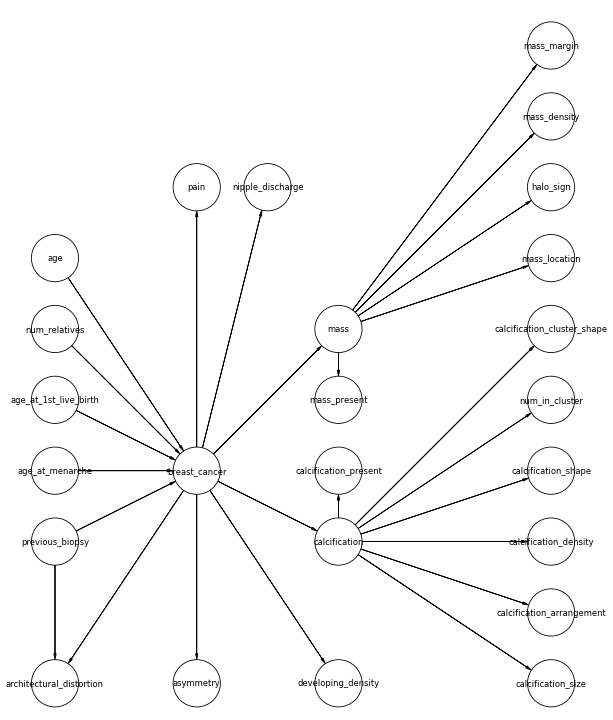

In [10]:
# have a look at the available systems
for system_name in true_systems_dict:    
    print(
        f"""
        System Name:    {true_systems_dict[system_name].system_name}
        System Source:  {true_systems_dict[system_name].system_source}
        """
    )
    
    plt.figure(figsize=(5,5))
    true_systems_dict[system_name].daft_model.render(dpi=60)
    plt.show()

In [5]:
# run scenarios and store results
scenario_counter = 0
for scenario in all_scenarios:
    print(f"started scenario {scenario_counter+1} of {len(all_scenarios)}----------------------------------------------------------------")
    print(f"    start time: {datetime.datetime.now().strftime('%H:%M:%S (%Y-%m-%d)')}")
    true_system=scenario[0]
    cost_per_intervention=scenario[1] 
    true_system_structure_known=scenario[2] 
    proportion_of_variables_observed=scenario[3]
    print(f"""    
    true_system                         {true_system}
    cost_per_intervention               {cost_per_intervention}
    true_system_structure_known         {true_system_structure_known}
    proportion_of_variables_observed    {proportion_of_variables_observed}
        """
    )

    "TO STUFF HERE"

    print(f"    COMPLETED scenario {scenario_counter+1} of {len(all_scenarios)}")
    print(f"    end time: {datetime.datetime.now().strftime('%H:%M:%S (%Y-%m-%d)')}")
    print()
    scenario_counter += 1


started scenario 1 of 12----------------------------------------------------------------
    start time: 16:01:47 (2023-02-24)
    
    true_system                         mammonet
    cost_per_intervention               0
    true_system_structure_known         yes
    proportion_of_variables_observed    1.0
        
    COMPLETED scenario 1 of 12
    end time: 16:01:47 (2023-02-24)

started scenario 2 of 12----------------------------------------------------------------
    start time: 16:01:47 (2023-02-24)
    
    true_system                         mammonet
    cost_per_intervention               0
    true_system_structure_known         yes
    proportion_of_variables_observed    0.75
        
    COMPLETED scenario 2 of 12
    end time: 16:01:47 (2023-02-24)

started scenario 3 of 12----------------------------------------------------------------
    start time: 16:01:47 (2023-02-24)
    
    true_system                         mammonet
    cost_per_intervention               0
